Enter number of points in the signal : 3
Enter the first index of the signal : -1
Enter the 1 input signal : 0
Enter the 2 input signal : 1
Enter the 3 input signal : 0
[-1.  0.  1.]


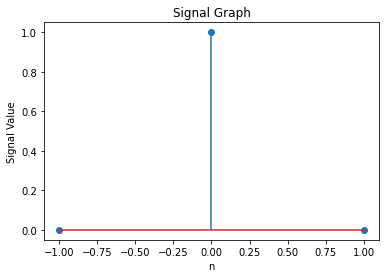

In [18]:
import numpy as np
import matplotlib.pyplot as plt

n = int(input("Enter number of points in the signal : "))     #number of points in the input signal
k = int(input("Enter the first index of the signal : "))      #Takes where the first index of signal should be placed
xaxis = np.linspace(k,n+k-1,n)                                #array to store indices where signal is present
lst = np.zeros(n ,dtype=complex)                              

count = 0   #measures number of complex inputs
mag = []    #array for storing magnitude of signal
pha = []    #array for storing phase of signal

for i in range(0, n): 
    element = input("Enter the %d input signal : " %(i+1))    #element is temp variable which stores the input
    element = element.replace(" ", "")                        #trims out spaces from the input if any                    
    lst[i] = complex(element)                                 #lst array stores the input signal
    if lst[i].imag != 0 :                                     #check for inputs with imaginary number
        count += 1                                            #if found increase count
    else :
        count += 0                                            #if not do nothing with count
    
if count==0 :                                                #if there are no imaginary parts for given input implies no complex input
    print(xaxis)
    plt.title("Signal Graph")                                #in this case we plot the signal graph as it is real signal
    plt.xlabel("n")  
    plt.ylabel("Signal Value")  
    plt.stem(xaxis,lst.real)
    plt.show()
else :                                                       #if count is not zero implies there is atleast one complex input
    for i in range(0,n):
        mag[i] = abs(lst[i])
        pha[i] = np.angle(lst[i], deg=True)
    
    plt.title("Magnitude Plot")                               #in this case plot magnitude and phase for input signal's
    plt.xlabel("n")  
    plt.ylabel("Magnitude")  
    plt.plot(mag)
    plt.show()
    plt.title("Phase Plot")  
    plt.xlabel("n")  
    plt.ylabel("Phase") 
    plt.plot(pha)
    plt.show()

## 

For exponent signal enter real value of base : 4
For sinusoidal signal enter amplitude : 5
For sinusoidal signal enter phase : 0


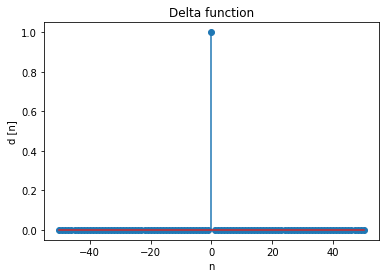

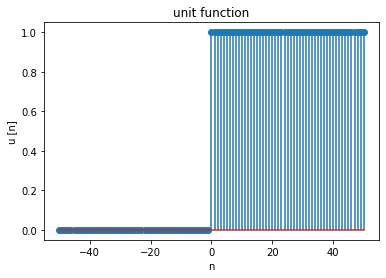

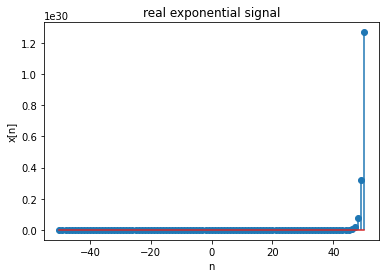

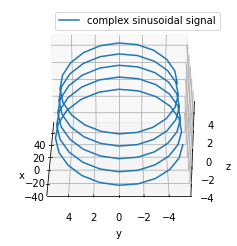

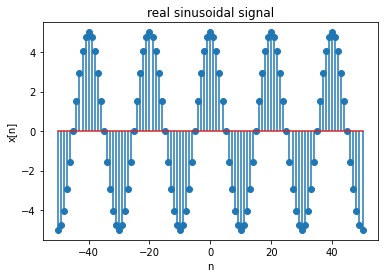

In [38]:
#importing required modules
import numpy as np
import matplotlib.pyplot as plt

N=50            #for Number of samples to plot  
K=20            # periodicity

#taking the required inputs
a=float(input("For exponent signal enter real value of base : ")) 
A=float(input("For sinusoidal signal enter amplitude : ")) 
degree=float(input("For sinusoidal signal enter phase : "))  

p=(degree*np.pi)/180 #converting the phase from degree to radians
w_0=(2*np.pi)/K  # frequency w_0

# defining delta function 
# in delta function gives output as 1 when n=0, rest at other points(i.e for n!=0) the output is 0
def Delta(n):
    if n!=0:     
        return 0  
    else:
        return 1
# defining unit function
# in unit step signal if n>=0 then the output is 1, rest at other points(i.e for n<0) the output is 0
def Unit(n):
    if n>=0:
        return 1
    else:
        return 0
# defining the function which calculates the power and returns the value
def pow(a,n):
    s=a**n
    return s

# range of discrete variable n
n=[i for i in range(-N,N+1)]
# computing delta function
x=[Delta(i) for i in n]
# computing unit step function
y=[Unit(i) for i in n]
# computing real exponential function
z=[pow(a,i) for i in n]
# computing for complex sinusoidal signal
t=[A*((np.cos(w_0*i+p)+ (np.sin(w_0*i+p))*1j)) for i in n]
# extracting real and imaginary components
t_r=[c.real for c in t]
t_c=[c.imag for c in t]

#plotting the figure1 which is delta function
plt.figure(1)
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('d [n]')
plt.title('Delta function')
plt.show()

#plotting the figure2 which is unit step signal
plt.figure(2)
plt.stem(n,y)
plt.xlabel('n')
plt.ylabel('u [n]')
plt.title('unit function')
plt.show()

#plotting the figure3 which is real exponential signal
plt.figure(3)
plt.stem(n,z)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('real exponential signal')
plt.show()

#plotting the figure4 which is complex sinusoidal signal
fig=plt.figure(4)
ax=fig.gca(projection='3d')
ax.plot(n,t_r,t_c,label='complex sinusoidal signal')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,180)
plt.show()

#plotting the figure5 which is real sinusoidal signal
plt.figure(5)
plt.stem(n,t_r)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('real sinusoidal signal')
plt.show()

Enter number of points in the signal : 4
Enter the first index of the signal : -2
Enter the 1 input signal : 0
Enter the 2 input signal : 0
Enter the 3 input signal : 1
Enter the 4 input signal : 0


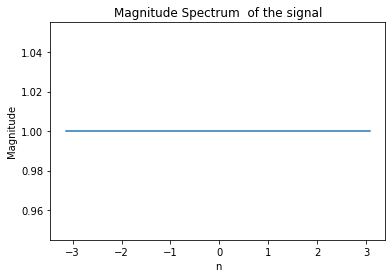

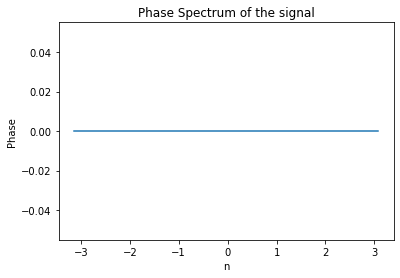

In [46]:
import numpy as np 
import matplotlib.pyplot as plt

k = int(input("Enter number of points in the signal : "))
m = int(input("Enter the first index of the signal : "))    
signal = np.zeros(k, dtype=complex)
N=100                                     #no of points to plot for omega
n=np.linspace(m,m+k-1,k)                  #array to store indices where signal is present
W = np.linspace(-np.pi,np.pi,N,endpoint=False) #range of omega


    
for i in range(0,k): 
    ele = input("Enter the %d input signal : " %(i+1))
    ele = ele.replace(" ", "")
    signal[i] = complex(ele)
    


def DTFT(W,sig,n):
    z = np.linspace(0,0,N,dtype=complex)
    for m in range(len(W)):                    #for all the omegas in given range
        dtft = 0
        for i in range (len(sig)):             #for all the points of signal
            dtft = dtft + (sig[i]*(np.cos(W[m]*n[i])-(np.sin(W[m]*n[i]))*1j))      #analysis equation
        z[m] = dtft
    return z                #returns an array which contains dtft of a specific W as element

z = DTFT(W,signal,n)
x=[]
y=[]
for i in range(len(z)):
    x.append(np.absolute(z[i]))
    y.append(np.angle(z[i]))


plt.figure(1)
plt.plot(W,x)
plt.xlabel('Omega')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum  of the signal')
plt.show()
plt.figure(2)
plt.plot(W,y)
plt.xlabel('Omega')
plt.ylabel('Phase (Radians)')
plt.title('Phase Spectrum of the signal')
plt.show()



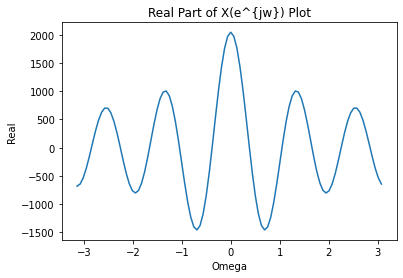

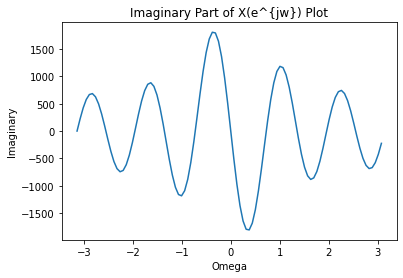

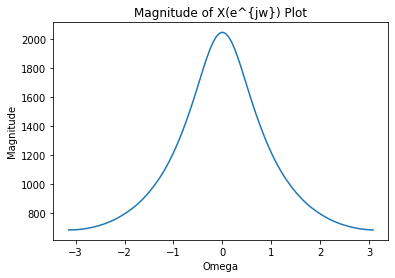

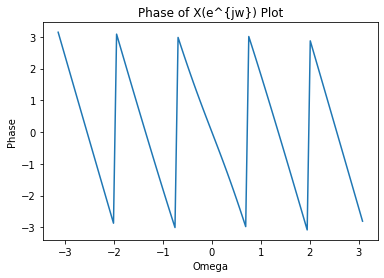

In [74]:
k=11
signal = np.zeros(k, dtype=complex)

n=np.linspace(int(-k/2),int(k/2),k)
a = 2
for i in range(0, k):
    signal[i] = a**i


W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z1 = DTFT(W,signal,n)

x1=[]
y1=[]
im1=[]
re1=[]

for i in range(len(z1)):
    x1.append(np.absolute(z1[i]))
    y1.append(np.angle(z1[i]))
    im1.append((z1[i]).imag)
    re1.append((z1[i]).real)
#real part should be even and imaginary part should be odd


plt.figure(1)
plt.title("Real Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Real")  
plt.plot(W,re1)
plt.show()  
plt.figure(2)
plt.title("Imaginary Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Imaginary")  
plt.plot(W,im1)
plt.show() 
plt.figure(3)
plt.title("Magnitude of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x1)
plt.show()  
plt.figure(4)
plt.title("Phase of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Phase")  
plt.plot(W,y1)
plt.show()

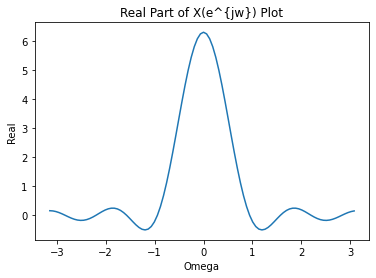

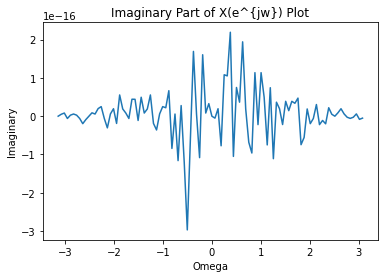

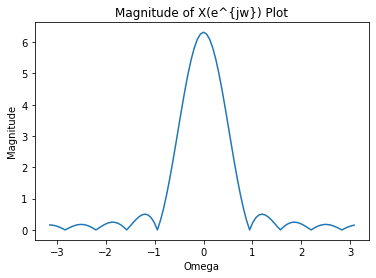

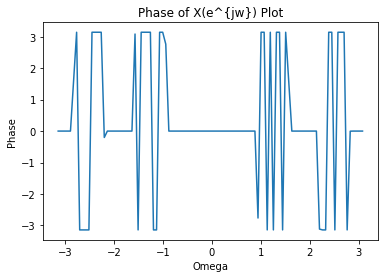

In [68]:
k=11
signal = np.zeros(k, dtype=complex)

n=np.linspace(int(-k/2),int(k/2),k)
w_0 = np.pi/10
for i in range(0, k):
    signal[i] = np.cos((w_0)*n[i])

W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z1 = DTFT(W,signal,n)

x1=[]
y1=[]    
im1=[]
re1=[]

for i in range(len(z1)):
    x1.append(np.absolute(z1[i]))
    y1.append(np.angle(z1[i]))
    im1.append((z1[i]).imag)
    re1.append((z1[i]).real)
    
#real part should be even and imaginary part should be zero
plt.figure(1)
plt.title("Real Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Real")  
plt.plot(W,re1)
plt.show()  
plt.figure(2)
plt.title("Imaginary Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Imaginary")  
plt.plot(W,im1)
plt.show() 
plt.figure(3)
plt.title("Magnitude of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x1)
plt.show()  
plt.figure(4)
plt.title("Phase of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Phase")  
plt.plot(W,y1)
plt.show()

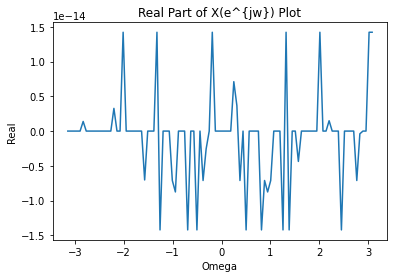

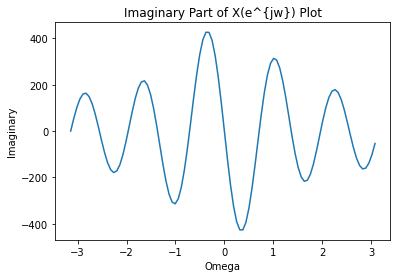

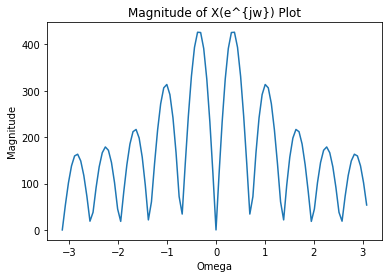

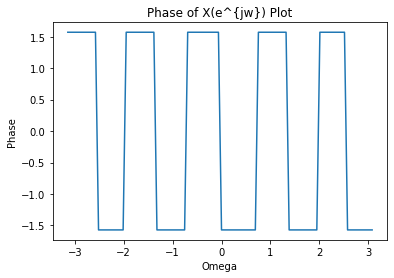

In [69]:
k=11
signal = np.zeros(k, dtype=complex)

n=np.linspace(int(-k/2),int(k/2),k)
for i in range(0, k):
    signal[i] = (n[i])**3

W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z1 = DTFT(W,signal,n)
z2 = DTFT(-W,signal,n)
x1=[]
y1=[]    
im1=[]
re1=[]

for i in range(len(z1)):
    x1.append(np.absolute(z1[i]))   
    y1.append(np.angle(z1[i]))
    im1.append((z1[i]).imag)
    re1.append((z1[i]).real)
    
#real part should be zero and imaginary part should be odd
plt.figure(1)
plt.title("Real Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Real")  
plt.plot(W,re1)
plt.show()  
plt.figure(2)
plt.title("Imaginary Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Imaginary")  
plt.plot(W,im1)
plt.show() 
plt.figure(3)
plt.title("Magnitude of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x1)
plt.show()  
plt.figure(4)
plt.title("Phase of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Phase")  
plt.plot(W,y1)
plt.show()

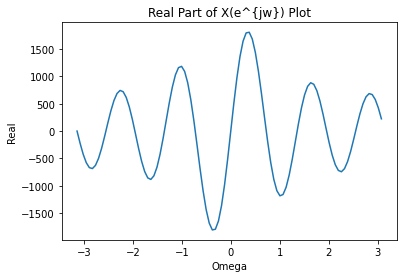

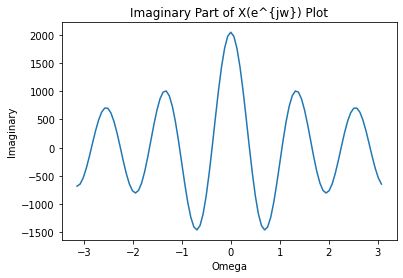

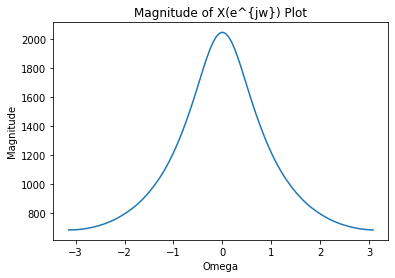

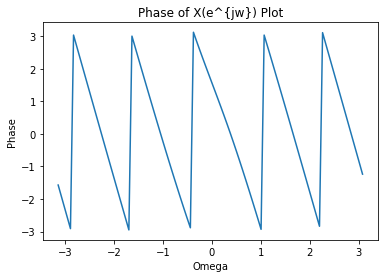

In [71]:
k=11
signal = np.zeros(k, dtype=complex)
a = 2
n=np.linspace(int(-k/2),int(k/2),k)
for i in range(0, k):
    signal[i] = 1j*(a**i)


W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z1 = DTFT(W,signal,n)
x1=[]
y1=[]
re1=[]
im1=[]

for i in range(len(z1)):
    x1.append(np.absolute(z1[i]))
    y1.append(np.angle(z1[i]))
    im1.append((z1[i]).imag)
    re1.append((z1[i]).real)
    
#real part should be odd and imaginary part should be even
plt.figure(1)
plt.title("Real Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Real")  
plt.plot(W,re1)
plt.show()  
plt.figure(2)
plt.title("Imaginary Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Imaginary")  
plt.plot(W,im1)
plt.show() 
plt.figure(3)
plt.title("Magnitude of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x1)
plt.show()  
plt.figure(4)
plt.title("Phase of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Phase")  
plt.plot(W,y1)
plt.show()

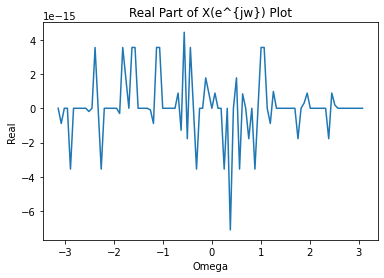

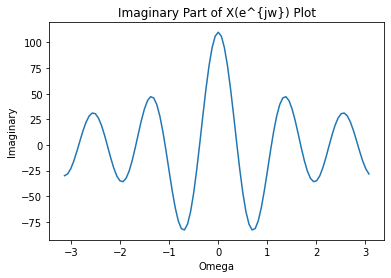

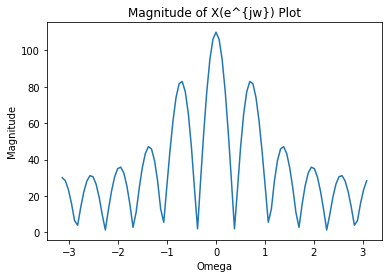

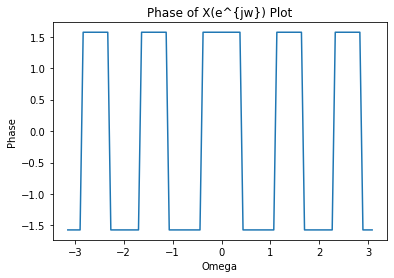

In [72]:
k=11
signal = np.zeros(k, dtype=complex)

n=np.linspace(int(-k/2),int(k/2),k)
for i in range(0, k):
    signal[i] = 1j*(n[i]**2)

W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z1 = DTFT(W,signal,n)
z2 = DTFT(-W,signal,n)
x1=[]
y1=[]
im1=[]
re1=[]

for i in range(len(z1)):
    x1.append(np.absolute(z1[i]))
    y1.append(np.angle(z1[i]))
    im1.append((z1[i]).imag)
    re1.append((z1[i]).real)
    
#real part should be zero and imaginary part should be even
plt.figure(1)
plt.title("Real Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Real")  
plt.plot(W,re1)
plt.show()  
plt.figure(2)
plt.title("Imaginary Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Imaginary")  
plt.plot(W,im1)
plt.show() 
plt.figure(3)
plt.title("Magnitude of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x1)
plt.show()  
plt.figure(4)
plt.title("Phase of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Phase")  
plt.plot(W,y1)
plt.show()

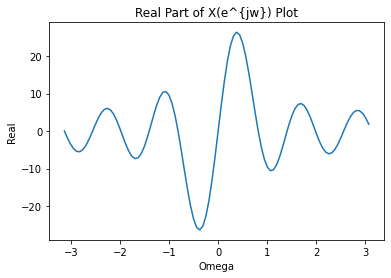

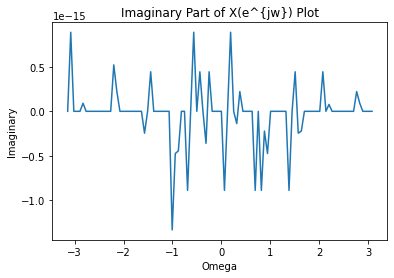

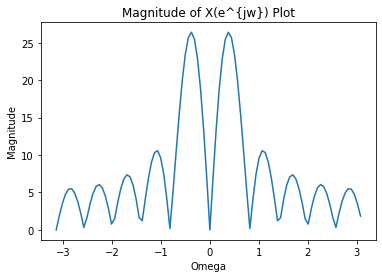

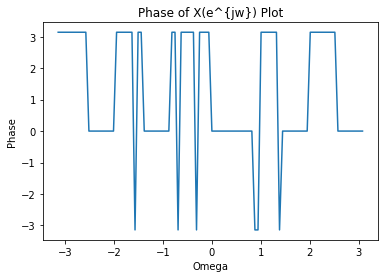

In [73]:
k=11
signal = np.zeros(k, dtype=complex)

n=np.linspace(int(-k/2),int(k/2),k)
for i in range(0, k):
    signal[i] = 1j*(n[i])

W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z1 = DTFT(W,signal,n)
z2 = DTFT(-W,signal,n)
x1=[]
y1=[]
im1=[]
re1=[]

for i in range(len(z1)):
    x1.append(np.absolute(z1[i]))
    y1.append(np.angle(z1[i]))
    im1.append((z1[i]).imag)
    re1.append((z1[i]).real)
    
#real part should be odd and imaginary part should be zero
plt.figure(1)
plt.title("Real Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Real")  
plt.plot(W,re1)
plt.show()  
plt.figure(2)
plt.title("Imaginary Part of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Imaginary")  
plt.plot(W,im1)
plt.show() 
plt.figure(3)
plt.title("Magnitude of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x1)
plt.show()  
plt.figure(4)
plt.title("Phase of X(e^{jw}) Plot")  
plt.xlabel("Omega")  
plt.ylabel("Phase")  
plt.plot(W,y1)
plt.show()

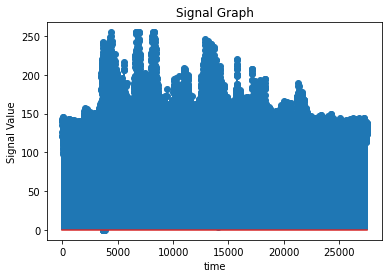

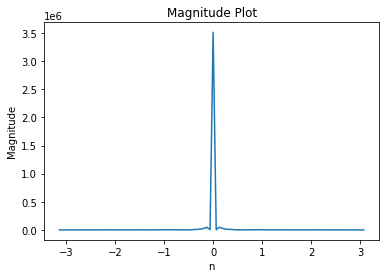

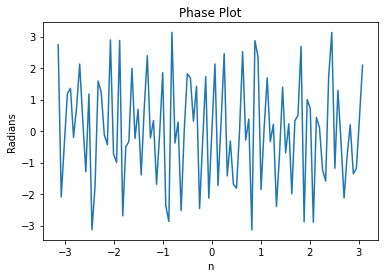

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import wave

N=100                                      #number of points of W for plotting
w = wave.open('armageddon.wav','rb')       #opening the audio file and storing it in a variable
lst= w.readframes(w.getnframes())          #accessing the elements of audio file into array
signal=[]                 
for i in range(w.getnframes()):
    frame = lst[i]                         #storing ith part in temp variable
    signal.append(frame)                   #appending the temp variable to the signal array    
    
n=np.linspace(0,int(len(signal)),len(signal))    #array containing indices
W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z = DTFT(W,signal,n)
x=[]
y=[]    
for i in range(len(z)):
    x.append(np.absolute(z[i]))
    y.append(np.angle(z[i]))

plt.figure(1)
plt.title("Signal Graph")  
plt.xlabel("time")  
plt.ylabel("Signal Value")  
plt.stem(signal)
plt.show()
plt.figure(2)
plt.title("Magnitude Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x)
plt.show()  
plt.figure(3)
plt.title("Phase Plot")  
plt.xlabel("Omega")  
plt.ylabel("Radians")  
plt.plot(W,y)
plt.show()

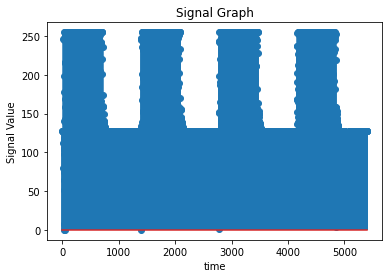

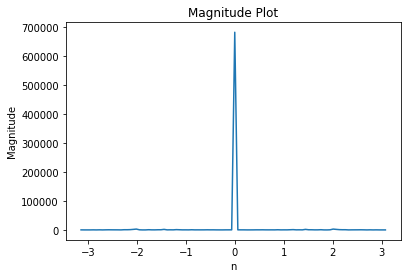

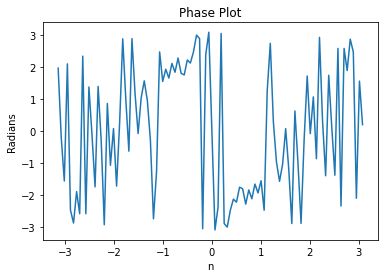

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import wave

N=100
w = wave.open('alarm.wav','rb')
lst= w.readframes(w.getnframes())
signal=[]
for i in range(w.getnframes()):
    frame = lst[i]
    signal.append(frame)
    
n=np.linspace(0,int(len(signal)),len(signal))  
W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z = DTFT(W,signal,n)
x=[]
y=[]    
for i in range(len(z)):
    x.append(np.absolute(z[i]))
    y.append(np.angle(z[i]))

plt.figure(1)
plt.title("Signal Graph")  
plt.xlabel("time")  
plt.ylabel("Signal Value")  
plt.stem(signal)
plt.show()
plt.figure(2)
plt.title("Magnitude Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x)
plt.show()  
plt.figure(3)
plt.title("Phase Plot")  
plt.xlabel("Omega")  
plt.ylabel("Radians")  
plt.plot(W,y)
plt.show()

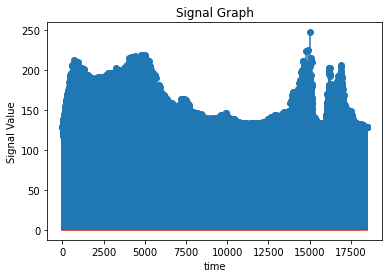

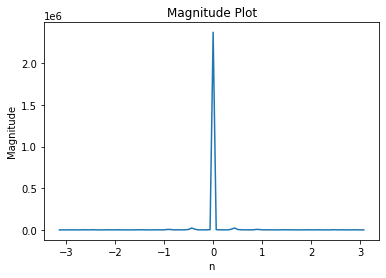

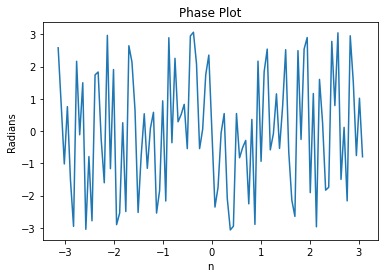

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import wave

N=100
w = wave.open('cry.wav','rb')
lst= w.readframes(w.getnframes())
signal=[]
for i in range(w.getnframes()):
    frame = lst[i]
    signal.append(frame)
    
n=np.linspace(0,int(len(signal)),len(signal))  
W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z = DTFT(W,signal,n)
x=[]
y=[]    
for i in range(len(z)):
    x.append(np.absolute(z[i]))
    y.append(np.angle(z[i]))

plt.figure(1)
plt.title("Signal Graph")  
plt.xlabel("time")  
plt.ylabel("Signal Value")  
plt.stem(signal)
plt.show()
plt.figure(2)
plt.title("Magnitude Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x)
plt.show()  
plt.figure(3)
plt.title("Phase Plot")  
plt.xlabel("Omega")  
plt.ylabel("Radians")  
plt.plot(W,y)
plt.show()

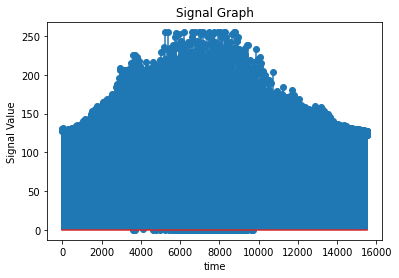

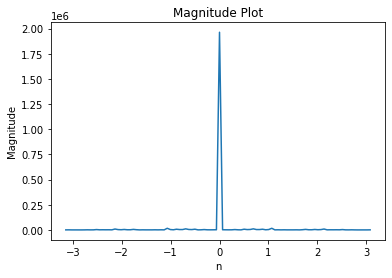

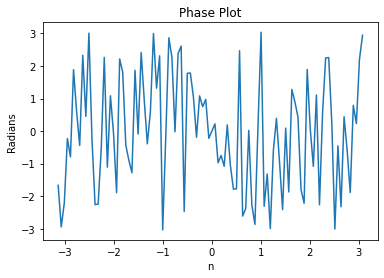

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import wave

N=100
w = wave.open('wow.wav','rb')
lst= w.readframes(w.getnframes())
signal=[]
for i in range(w.getnframes()):
    frame = lst[i]
    signal.append(frame)
    
n=np.linspace(0,int(len(signal)),len(signal))  
W = np.linspace(-np.pi,np.pi,N,endpoint=False)
z = DTFT(W,signal,n)
x=[]
y=[]    
for i in range(len(z)):
    x.append(np.absolute(z[i]))
    y.append(np.angle(z[i]))

plt.figure(1)
plt.title("Signal Graph")  
plt.xlabel("time")  
plt.ylabel("Signal Value")  
plt.stem(signal)
plt.show()
plt.figure(2)
plt.title("Magnitude Plot")  
plt.xlabel("Omega")  
plt.ylabel("Magnitude")  
plt.plot(W,x)
plt.show()  
plt.figure(3)
plt.title("Phase Plot")  
plt.xlabel("Omega")  
plt.ylabel("Radians")  
plt.plot(W,y)
plt.show()

In [57]:
import numpy as np

for i in range(0,N):
    z[i] = i+1j*i
z2=np.conj(z)
print(z)
print(z2)

[ 0. +0.j  1. +1.j  2. +2.j  3. +3.j  4. +4.j  5. +5.j  6. +6.j  7. +7.j
  8. +8.j  9. +9.j 10.+10.j 11.+11.j 12.+12.j 13.+13.j 14.+14.j 15.+15.j
 16.+16.j 17.+17.j 18.+18.j 19.+19.j 20.+20.j 21.+21.j 22.+22.j 23.+23.j
 24.+24.j 25.+25.j 26.+26.j 27.+27.j 28.+28.j 29.+29.j 30.+30.j 31.+31.j
 32.+32.j 33.+33.j 34.+34.j 35.+35.j 36.+36.j 37.+37.j 38.+38.j 39.+39.j
 40.+40.j 41.+41.j 42.+42.j 43.+43.j 44.+44.j 45.+45.j 46.+46.j 47.+47.j
 48.+48.j 49.+49.j 50.+50.j 51.+51.j 52.+52.j 53.+53.j 54.+54.j 55.+55.j
 56.+56.j 57.+57.j 58.+58.j 59.+59.j 60.+60.j 61.+61.j 62.+62.j 63.+63.j
 64.+64.j 65.+65.j 66.+66.j 67.+67.j 68.+68.j 69.+69.j 70.+70.j 71.+71.j
 72.+72.j 73.+73.j 74.+74.j 75.+75.j 76.+76.j 77.+77.j 78.+78.j 79.+79.j
 80.+80.j 81.+81.j 82.+82.j 83.+83.j 84.+84.j 85.+85.j 86.+86.j 87.+87.j
 88.+88.j 89.+89.j 90.+90.j 91.+91.j 92.+92.j 93.+93.j 94.+94.j 95.+95.j
 96.+96.j 97.+97.j 98.+98.j 99.+99.j]
[ 0. -0.j  1. -1.j  2. -2.j  3. -3.j  4. -4.j  5. -5.j  6. -6.j  7. -7.j
  8. -8.j  9.